In [0]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading Dataset
dataset = pd.read_csv('adult.csv')
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [0]:
#List of columns present in Dataset
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [0]:
#Renaming few columns
dataset.rename(columns = {'education.num':'education_num', 'marital.status':'marital_status', 'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'}, inplace = True) 
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [0]:
#Replacing "?" with NAN
dataset['workclass'].replace('?', np.nan, inplace= True)
dataset['occupation'].replace('?', np.nan, inplace= True)
dataset['native_country'].replace('?', np.nan, inplace= True)


<bound method DataFrame.info of        age workclass  fnlwgt  ... hours_per_week  native_country income
0       90       NaN   77053  ...             40   United-States  <=50K
1       82   Private  132870  ...             18   United-States  <=50K
2       66       NaN  186061  ...             40   United-States  <=50K
3       54   Private  140359  ...             40   United-States  <=50K
4       41   Private  264663  ...             40   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States  <=50K
32557   27   Private  257302  ...             38   United-States  <=50K
32558   40   Private  154374  ...             40   United-States   >50K
32559   58   Private  151910  ...             40   United-States  <=50K
32560   22   Private  201490  ...             20   United-States  <=50K

[32561 rows x 15 columns]>

In [0]:
#Droping null values in Occupation column
data1 = dataset.dropna(subset=['occupation'])
data1.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64

In [0]:
#Final shape
data1.shape

(30718, 15)

In [0]:
#A detailed description of the datset
data1.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,30718.000000,30718,3.071800e+04,30718,30718.000000,30718,30718,30718,30718,30718,30718.000000,30718.000000,30718.000000,30162,30718
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,9968,NaN,14339,4140,12704,26301,20788,NaN,NaN,NaN,27504,23068
mean,38.443584,NaN,1.898455e+05,NaN,10.130314,NaN,NaN,NaN,NaN,NaN,1106.037079,88.910216,40.949313,NaN,NaN
std,13.118227,NaN,1.054583e+05,NaN,2.562469,NaN,NaN,NaN,NaN,NaN,7497.863364,405.657203,11.985382,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178285e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.785170e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.373170e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [0]:
#Imputing null values with Mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
imp_data = pd.DataFrame(imputer.fit_transform(data1))
imp_data.columns= data1.columns
imp_data.index = data1.index

In [0]:
#Checking Null values
imp_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [0]:
##Label encoding the all the categorical feautures
data = imp_data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['income','workclass','education','marital_status','occupation','relationship','race','sex','native_country']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))


In [0]:
#Checking the categorical features
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


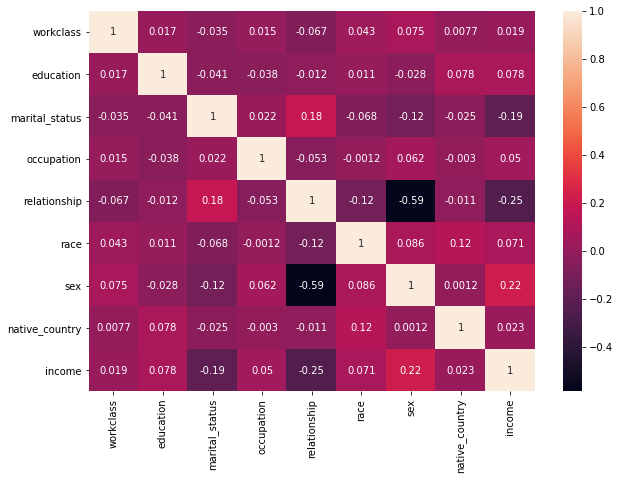

In [0]:
#Finding Correlation between variables
corr = data.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

In [0]:
#Slicing dataset into Independent(X) and Target(y) varibles
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [0]:
#Dividing dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Training the Decision Tree on Train data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#Predicting the Test data
y_pred = classifier.predict(X_test)

In [0]:
#Evaluation of Prediction on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6001  881]
 [ 847 1487]]


In [0]:
#Accuracy Metric
from sklearn.metrics import accuracy_score as accuracy_score
acs = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
acs*100

81.25

In [0]:
#A detailed Classification Report
from sklearn.metrics import classification_report
c_r = classification_report(y_test, y_pred)
print(c_r)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6882
           1       0.63      0.64      0.63      2334

    accuracy                           0.81      9216
   macro avg       0.75      0.75      0.75      9216
weighted avg       0.81      0.81      0.81      9216



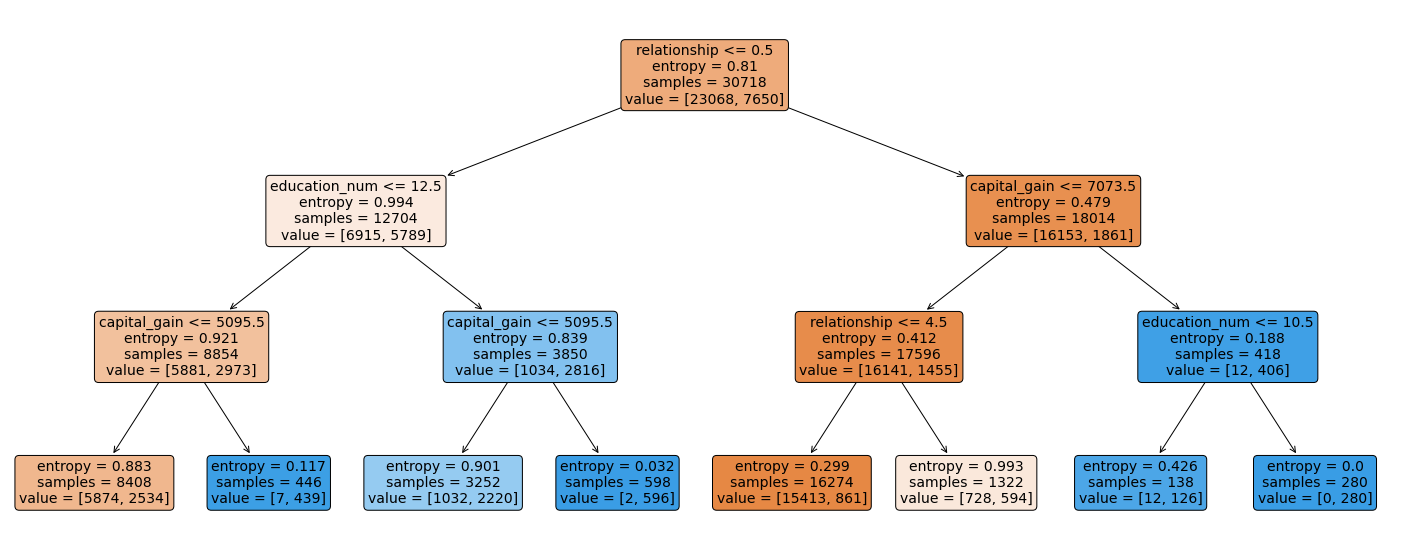

In [0]:
#Plotting the Decision Tree
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth=3, criterion = 'entropy') 
clf.fit(X,y)
Independent_variables = data.iloc[:, :-1]
Targrt_variable= data.iloc[:, 14:15]
plt.figure(figsize=(25,10))
a = plot_tree(clf ,filled=True,feature_names=Independent_variables.columns,rounded=True,fontsize=14 )

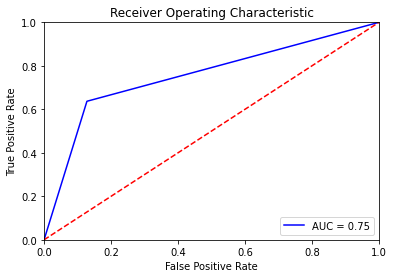

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#Plotting the ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()